In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:\\Python\\Netology2\\Adpy\\Lesson 2.6\\files')

In [3]:
#### Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
path = os.path.abspath('files')

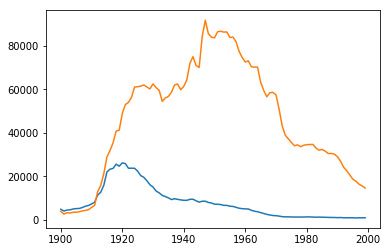

In [195]:
names_by_year = {}
for year in range(1900, 2000):
    names_by_year[year] = pd.read_csv(os.path.abspath(f'yob{year}.txt'), sep=',', encoding='utf-8', header=None,
                              names=["Name", "Gender", "Count"])
res_df = pd.concat(names_by_year).reset_index(level=1, drop=True)
ruth_find = res_df[res_df["Name"] == "Ruth"]
ruth = ruth_find.groupby([ruth_find.index, 'Name']).sum()
plt.plot(ruth.unstack())
robert_find = res_df[res_df["Name"] == "Robert"]
robert = robert_find.groupby([robert_find.index, 'Name']).sum()
plt.plot(robert.unstack())



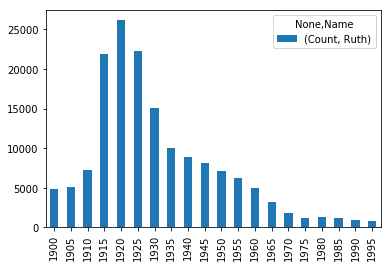

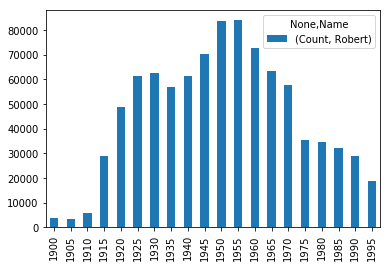

In [197]:
### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)
ruth5 = ruth.iloc[list(range(0,100,5))].unstack()
robert5 = robert.iloc[list(range(0,100,5))].unstack()
ruth5.plot(kind='bar')
robert5.plot(kind='bar')





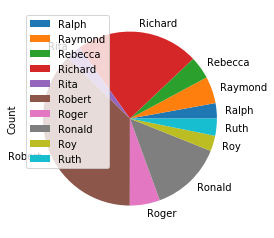

In [199]:
### Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
year = 1950
top_by_year = {}
top_by_year[year] = pd.read_csv(os.path.abspath(f'yob{year}.txt'), sep=',', encoding='utf-8', header=None,
                              names=["Name", "Gender", "Count"])
res_df = pd.concat(top_by_year).reset_index(level=1, drop=True)
top = res_df[res_df['Name'].str.contains("R")].sort_values('Count', ascending=False).head(10)
top.groupby(['Name']).sum()
top.groupby(['Name']).sum().plot(kind='pie', y='Count')


In [ ]:
### Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
### Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в 
### каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".